In [13]:
import numpy as np
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [14]:
warnings.filterwarnings('ignore')

# TESLA

In [15]:
df_tesla = pd.read_csv("D:/ntu/6312/stock_data/tsla.csv")
df_tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [16]:
print(df_tesla.head())
print(df_tesla.shape)
print(df_tesla.columns)

         Date   Open   High    Low  Close  Adj Close    Volume
0  2010-06-29  3.800  5.000  3.508  4.778      4.778  93831500
1  2010-06-30  5.158  6.084  4.660  4.766      4.766  85935500
2  2010-07-01  5.000  5.184  4.054  4.392      4.392  41094000
3  2010-07-02  4.600  4.620  3.742  3.840      3.840  25699000
4  2010-07-06  4.000  4.000  3.166  3.222      3.222  34334500
(2684, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


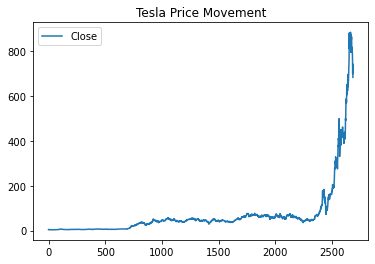

In [17]:
df_tesla[['Close']].plot()
plt.title("Tesla Price Movement")
plt.show()

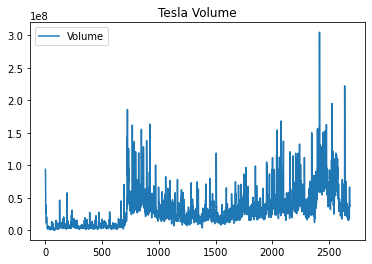

In [18]:
df_tesla[['Volume']].plot()
plt.title("Tesla Volume")
plt.show()

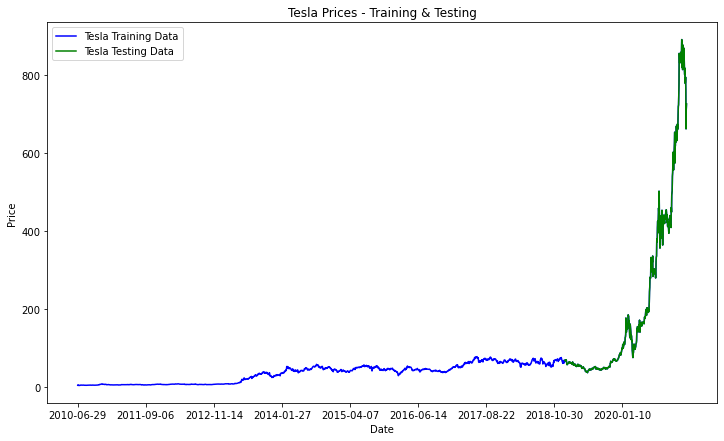

In [19]:
train_data_tesla, test_data_tesla = df_tesla[0:int(len(df_tesla)*0.8)], df_tesla[int(len(df_tesla)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices - Training & Testing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df_tesla['Open'], 'blue', label='Tesla Training Data')
plt.plot(test_data_tesla['Open'], 'green', label='Tesla Testing Data')
plt.xticks(np.arange(0,2684,300), df_tesla['Date'][0:2684:300])
plt.legend()

In [20]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [21]:
train_ma_tesla = train_data_tesla['Open'].values
test_ma_tesla = test_data_tesla['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

history_tesla = [x for x in train_ma_tesla]
print(type(history_tesla))
predictions_tesla = list()
for t in range(len(test_ma_tesla)):
    model_tesla = ARIMA(history_tesla, order=(5,1,0))
    model_fit_tesla = model_tesla.fit(disp=0)
    output_tesla = model_fit_tesla.forecast()
    yhat_tesla = output_tesla[0]
    predictions_tesla.append(yhat_tesla)
    obs_tesla = test_ma_tesla[t]
    history_tesla.append(obs_tesla)
       
mse_tesla = mean_squared_error(test_ma_tesla, predictions_tesla)
print('Testing Mean Squared Error = %.3f' % mse_tesla)
mae_tesla = smape_kun(test_ma_tesla, predictions_tesla)
print('Symmetric mean absolute percentage error = %.3f' % mae_tesla)

<class 'list'>
Testing Mean Squared Error = 220.284
Symmetric mean absolute percentage error = 88.186


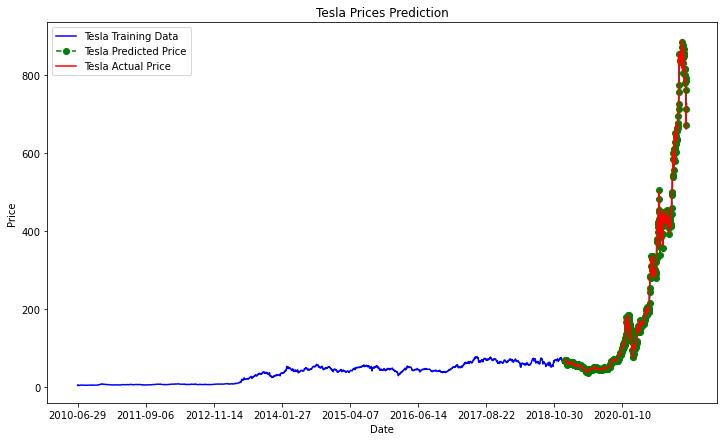

In [22]:
plt.figure(figsize=(12,7))
plt.plot(df_tesla['Open'], 'green', color='blue', label='Tesla Training Data')
plt.plot(test_data_tesla.index, predictions_tesla, color='green', marker='o', linestyle='dashed', 
         label='Tesla Predicted Price')
plt.plot(test_data_tesla.index, test_data_tesla['Open'], color='red', label='Tesla Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(np.arange(0,2684,300), df_tesla['Date'][0:2684:300])
plt.legend()

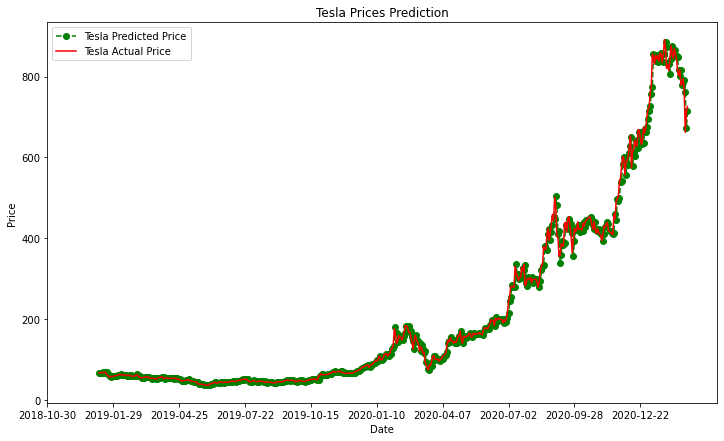

In [24]:
plt.figure(figsize=(12,7))
plt.plot(test_data_tesla.index, predictions_tesla, color='green', marker='o', linestyle='dashed', 
         label='Tesla Predicted Price')
plt.plot(test_data_tesla.index, test_data_tesla['Open'], color='red', label='Tesla Actual Price')
plt.xticks(np.arange(2100,2684,60), df_tesla['Date'][2100:2684:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# GOOGLE

In [25]:
df_google = pd.read_csv("D:/ntu/6312/stock_data/goog.csv")
df_google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [27]:
print(df_google.head())
print(df_google.shape)
print(df_google.columns)

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  49.813290  51.835709  47.800831  49.982655  49.982655  44871361
1  2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942874
2  2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342897
3  2004-08-24  55.412300  55.591629  51.591621  52.239197  52.239197  15319808
4  2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232276
(4159, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


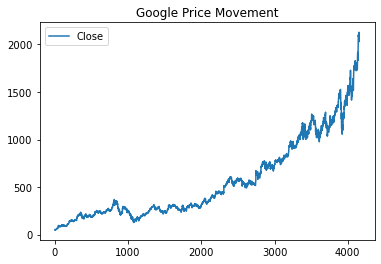

In [28]:
df_google[['Close']].plot()
plt.title("Google Price Movement")
plt.show()

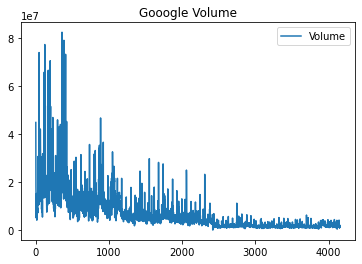

In [29]:
df_google[['Volume']].plot()
plt.title("Gooogle Volume")
plt.show()

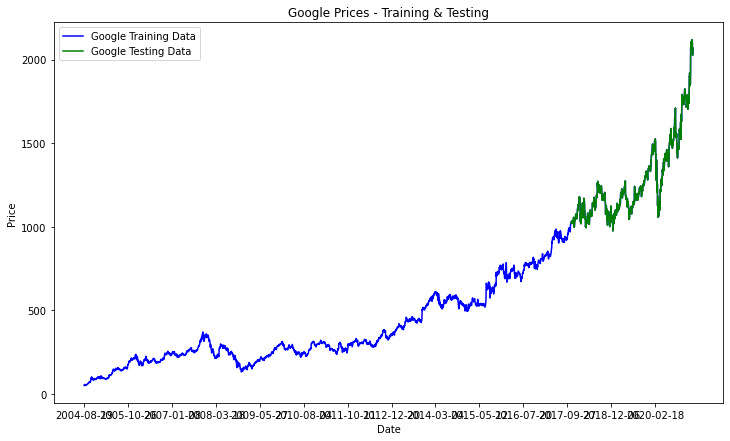

In [33]:
train_data_google, test_data_google = df_google[0:int(len(df_google)*0.8)], df_google[int(len(df_google)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Google Prices - Training & Testing')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df_google['Open'], 'blue', label='Google Training Data')
plt.plot(test_data_google['Open'], 'green', label='Google Testing Data')
plt.xticks(np.arange(0,4159,300), df_google['Date'][0:4159:300])
plt.legend()

In [34]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [35]:
train_ma_google = train_data_google['Open'].values
test_ma_google = test_data_google['Open'].values

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

history_google = [x for x in train_ma_google]
print(type(history_google))
predictions_google = list()
for t in range(len(test_ma_google)):
    model_google = ARIMA(history_google, order=(5,1,0))
    model_fit_google = model_google.fit(disp=0)
    output_google = model_fit_google.forecast()
    yhat_google = output_google[0]
    predictions_google.append(yhat_google)
    obs_google = test_ma_google[t]
    history_google.append(obs_google)
    
mse_google = mean_squared_error(test_ma_google, predictions_google)
print('Testing Mean Squared Error = %.3f' % mse_google)
mae_google = smape_kun(test_ma_google, predictions_google)
print('Symmetric mean absolute percentage error = %.3f' % mae_google)

<class 'list'>
Testing Mean Squared Error = 609.794
Symmetric mean absolute percentage error = 18.720


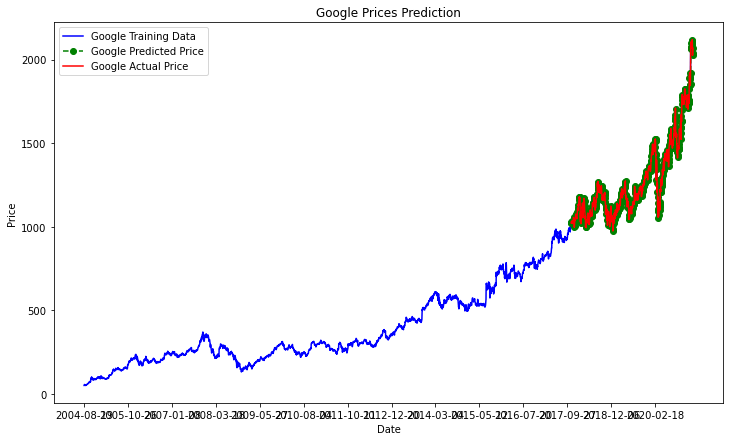

In [36]:
plt.figure(figsize=(12,7))
plt.plot(df_google['Open'], 'green', color='blue', label='Google Training Data')
plt.plot(test_data_google.index, predictions_google, color='green', marker='o', linestyle='dashed', 
         label='Google Predicted Price')
plt.plot(test_data_google.index, test_data_google['Open'], color='red', label='Google Actual Price')
plt.title('Google Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(np.arange(0,4159,300), df_google['Date'][0:4159:300])
plt.legend()

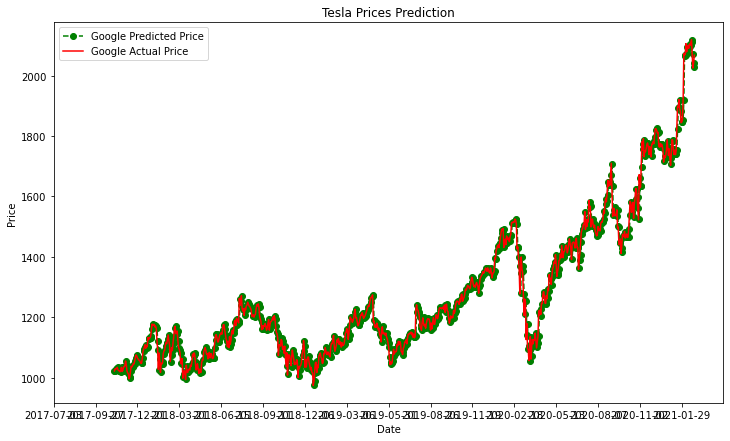

In [42]:
plt.figure(figsize=(12,7))
plt.plot(test_data_google.index, predictions_google, color='green', marker='o', linestyle='dashed', 
         label='Google Predicted Price')
plt.plot(test_data_google.index, test_data_google['Open'], color='red', label='Google Actual Price')
plt.xticks(np.arange(3240,4159,60), df_google['Date'][3240:4159:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()